<a href="https://colab.research.google.com/github/meeel29/Analisis-de-datos-/blob/main/Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Limpieza y Análisis Exploratorio de Datos (EDA)

In [47]:
# ============================================
# 1. Instalación y configuración inicial
# ============================================
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Configuración visual
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (6, 4)

In [49]:
# ============================================
# 2. Carga de datos
# ============================================

mall = pd.read_csv("Mall_Customers.csv")
wholesale = pd.read_csv("Wholesale customers data.csv")

print("Mall shape:", mall.shape)
print("Wholesale shape:", wholesale.shape)

Mall shape: (200, 5)
Wholesale shape: (440, 8)


In [50]:
# ============================================
# 3. Exploración inicial
# ============================================

print("\nPrimeras filas de Mall Customers:")
display(mall.head())

print("\nPrimeras filas de Wholesale Customers:")
display(wholesale.head())



Primeras filas de Mall Customers:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Primeras filas de Wholesale Customers:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [51]:
# ============================================
# 4. Revisión de valores nulos y duplicados
# ============================================

print("Valores nulos en Mall Customers:")
print(mall.isnull().sum(), "\n")
print("Duplicados:", mall.duplicated().sum(), "\n")

print("Valores nulos en Wholesale Customers:")
print(wholesale.isnull().sum(), "\n")
print("Duplicados:", wholesale.duplicated().sum(), "\n")


Valores nulos en Mall Customers:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64 

Duplicados: 0 

Valores nulos en Wholesale Customers:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64 

Duplicados: 0 



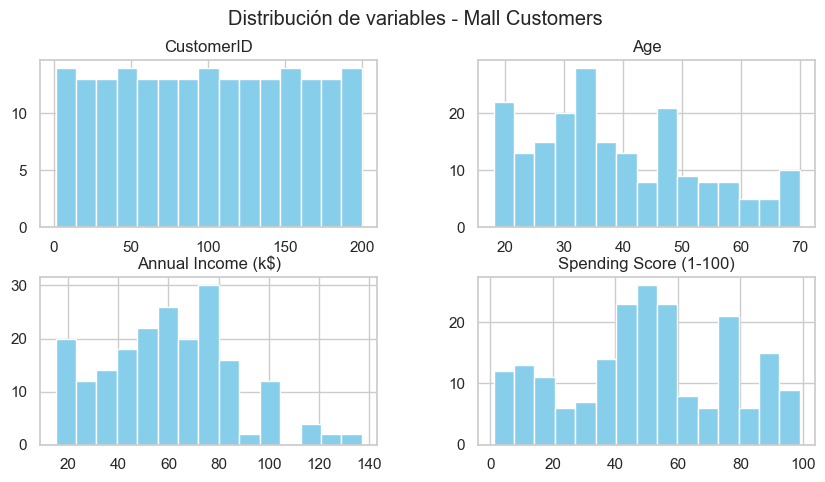

In [52]:
# ============================================
# 5. Exploración visual
# ============================================

# Histogramas Mall
mall.hist(bins=15, figsize=(10, 5), color='skyblue')
plt.suptitle("Distribución de variables - Mall Customers")
plt.show()

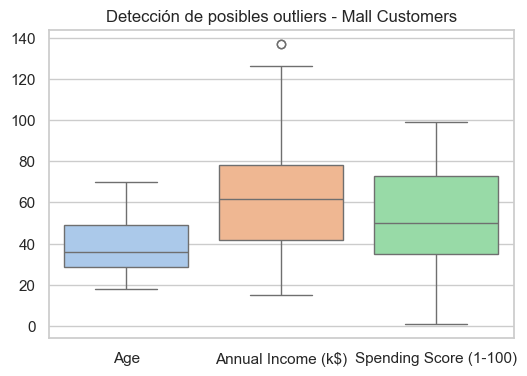

In [53]:
# Boxplots Mall
sns.boxplot(data=mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Detección de posibles outliers - Mall Customers")
plt.show()

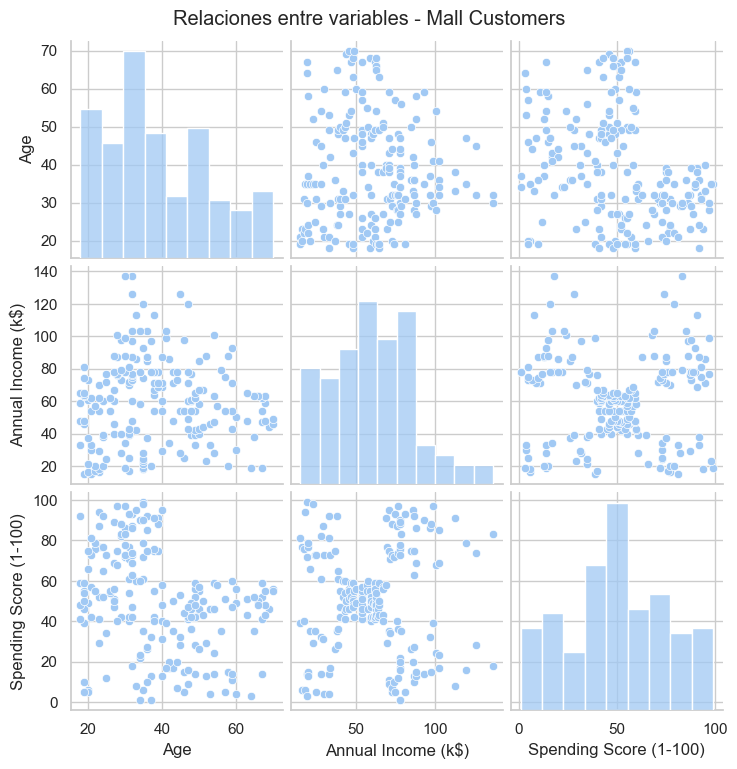

In [54]:
# Pairplot Mall
sns.pairplot(mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Relaciones entre variables - Mall Customers", y=1.02)
plt.show()

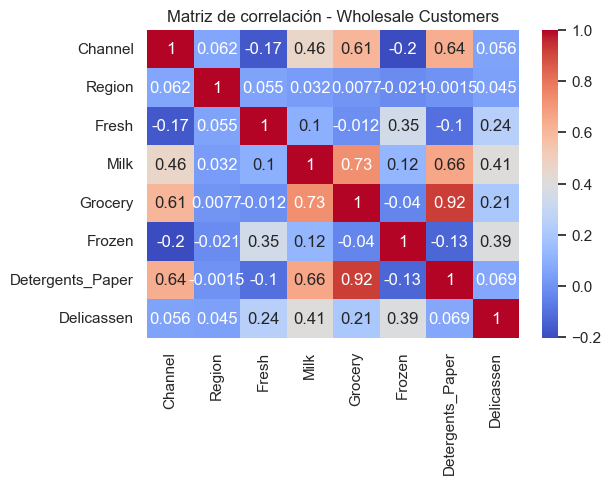

In [55]:
# Correlación Wholesale
sns.heatmap(wholesale.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación - Wholesale Customers")
plt.show()

In [56]:
# ============================================
# 6. Normalización / estandarización
# ============================================

scaler = StandardScaler()

# Mall Customers: solo variables numéricas relevantes
mall_scaled = mall.copy()
mall_scaled[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

# Wholesale Customers: excluye columnas categóricas
wholesale_scaled = wholesale.copy()
wholesale_scaled.iloc[:, 2:] = scaler.fit_transform(wholesale.iloc[:, 2:])

In [57]:
# ============================================
# 7. Guardar datasets limpios
# ============================================

os.makedirs("data", exist_ok=True)
mall_scaled.to_csv("data/mall_clean.csv", index=False)
wholesale_scaled.to_csv("data/wholesale_clean.csv", index=False)

print("Archivos guardados en carpeta /data")

Archivos guardados en carpeta /data


In [ ]:
# ============================================
# 8. Resumen final
# ============================================

print("Mall Customers (después de limpieza):", mall_scaled.shape)
print("Wholesale Customers (después de limpieza):", wholesale_scaled.shape)

mall_scaled.describe()

Mall Customers (después de limpieza): (200, 5)
Wholesale Customers (después de limpieza): (440, 8)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,100.500000,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,57.879185,1.002509e+00,1.002509e+00,1.002509e+00
min,1.000000,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,50.750000,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,100.500000,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,150.250000,7.284319e-01,6.656748e-01,8.851316e-01
max,200.000000,2.235532e+00,2.917671e+00,1.894492e+00
